In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [3]:
df=pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [18]:
df.drop(['Rownumber'."CustomerId","Surname"],axis=1,inplace=True)

In [7]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [9]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
df.duplicated().sum()

0

In [15]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [16]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [25]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True,dtype=int)

In [26]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [47]:
df.shape

(10000, 12)

In [29]:
from sklearn.model_selection import train_test_split
x=df.drop('Exited',axis=1)
y=df['Exited']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [36]:
x_train.shape

(7500, 11)

In [38]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_train_scaled=st.fit_transform(x_train)
x_test_scaled=st.fit_transform(x_test)

In [40]:
x_train_scaled

array([[ 1.1293275 ,  0.10090931, -0.34318976, ..., -0.57427105,
        -0.57303933,  0.9030731 ],
       [ 0.91156898,  0.10090931,  0.34863209, ...,  1.74133801,
        -0.57303933, -1.10733007],
       [-0.03205129,  0.38585653, -0.68910069, ...,  1.74133801,
        -0.57303933, -1.10733007],
       ...,
       [-1.2556468 , -0.84891477, -1.03501162, ..., -0.57427105,
        -0.57303933,  0.9030731 ],
       [ 0.46568248,  0.48083894,  1.04045395, ..., -0.57427105,
         1.74508093,  0.9030731 ],
       [-0.01131238,  0.19589172, -0.34318976, ...,  1.74133801,
        -0.57303933, -1.10733007]])

In [45]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [152]:
model=Sequential()
#we have one ip,hidden,op
#ip layer        node 
model.add(Dense(11,activation='relu',input_dim=11))
#we add one more layer

model.add(Dense(11,activation='relu'))

#op

model.add(Dense(1,activation='sigmoid'))
#we add one more layer


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [153]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [154]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['Accuracy'])

In [155]:
history=model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Accuracy: 0.4377 - loss: 0.8295 - val_Accuracy: 0.7947 - val_loss: 0.4966
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.7983 - loss: 0.4794 - val_Accuracy: 0.7980 - val_loss: 0.4558
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.8031 - loss: 0.4501 - val_Accuracy: 0.7973 - val_loss: 0.4398
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.8144 - loss: 0.4285 - val_Accuracy: 0.8060 - val_loss: 0.4291
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Accuracy: 0.8091 - loss: 0.4198 - val_Accuracy: 0.8193 - val_loss: 0.4159
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Accuracy: 0.8314 - loss: 0.3899 - val_Accuracy: 0.8300 - val_loss: 0.4008
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Accuracy: 0.8378 - loss: 0.3860 - val_Accuracy: 0.8353 - val_loss: 0.3889
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Accuracy: 0.8465 - loss: 0.3673 - val_Accu

In [156]:
#as per calculation 11*3 weigths and 3 bias in layer 1
model.layers[0].get_weights()

[array([[-0.10037125,  0.01745935, -0.20671035,  0.01443779,  0.1573315 ,
          0.30234715, -0.0657514 ,  0.32221442, -0.24670866, -0.12751311,
          0.32797784],
        [-0.66374826,  0.13020116, -0.6414969 ,  0.01423198, -0.2562037 ,
          0.2599459 ,  1.1266338 , -0.01873173,  0.73939425,  0.89164233,
          0.5097155 ],
        [ 0.02212637, -0.25035447,  0.00552724,  0.34988248,  0.01021595,
         -0.03325742, -0.09939126, -0.05878017,  0.5111562 , -0.18455309,
         -0.2429953 ],
        [-0.21090494, -0.29474849, -0.07526688, -0.03979047, -1.0534986 ,
         -0.15800637, -0.1286077 , -0.12833416, -0.4006492 , -0.06615245,
          0.00815025],
        [ 0.37784103,  0.98428965,  0.00878299,  1.0031655 ,  0.26022893,
          0.14474787, -0.3506293 , -0.1423555 , -0.16261753,  1.0697865 ,
          0.1663556 ],
        [ 0.13547651, -0.22145303, -0.07777256, -0.0999384 , -0.21622391,
         -0.316304  ,  0.04546596,  0.38370976,  0.3048924 ,  0.0927007

In [157]:
#as per calculation 3*1 weigths and 1 bias in layer 2
model.layers[1].get_weights()

[array([[ 0.27086163, -0.5118209 ,  0.30819935,  0.11154857, -0.12661365,
         -0.39220312,  0.10072289,  0.35877982,  0.48955458,  0.55380374,
         -0.11340987],
        [ 0.8210873 ,  0.39057708,  0.4454899 , -1.4155875 , -0.0147121 ,
          0.55453944,  0.11919308,  0.099494  ,  0.4102119 ,  0.03572315,
         -0.24752118],
        [-0.13362022,  0.48058617,  0.176327  ,  0.3438678 , -0.49499938,
         -0.34259343,  0.59916055,  0.652293  ,  0.02589008,  0.5797743 ,
          0.19642377],
        [ 0.93148273, -0.48464322, -0.32927957, -0.7906993 , -0.14670122,
          0.6912324 ,  0.47819948, -0.10953662,  0.31401122, -0.1620911 ,
         -0.43398055],
        [-0.73743224,  0.53199023, -0.17645329,  0.7826245 , -0.28076804,
         -0.11941243, -0.14726597,  0.23943001, -0.62693846,  0.12925398,
          0.4674477 ],
        [-0.26226792, -0.06494345,  0.53451514, -0.16906689, -0.29019755,
          0.09963692,  0.1554888 ,  0.3696415 ,  0.1595479 ,  0.1809448

In [158]:
y_log=model.predict(x_test_scaled)
#to conert to 0 and 1 we have to gove threshold we assume it as 0.5 

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [159]:
y_pred=np.where(y_log>0.5,1,0)

In [160]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8552

In [161]:
history.history

{'Accuracy': [0.6258333325386047,
  0.8036666512489319,
  0.8081666827201843,
  0.8149999976158142,
  0.8218333125114441,
  0.831333339214325,
  0.8389999866485596,
  0.8458333611488342,
  0.8511666655540466,
  0.8528333306312561,
  0.8558333516120911,
  0.8571666479110718,
  0.859666645526886,
  0.8619999885559082,
  0.8619999885559082,
  0.862666666507721,
  0.8636666536331177,
  0.8640000224113464,
  0.8621666431427002,
  0.8634999990463257,
  0.8634999990463257,
  0.8643333315849304,
  0.8646666407585144,
  0.8650000095367432,
  0.8638333082199097,
  0.8656666874885559,
  0.8656666874885559,
  0.8661666512489319,
  0.8636666536331177,
  0.8663333058357239,
  0.8628333210945129,
  0.8678333163261414,
  0.8658333420753479,
  0.8673333525657654,
  0.8653333187103271,
  0.8669999837875366,
  0.8656666874885559,
  0.8668333292007446,
  0.8681666851043701,
  0.8646666407585144,
  0.8673333525657654,
  0.8663333058357239,
  0.8673333525657654,
  0.8654999732971191,
  0.8675000071525574,
 

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt


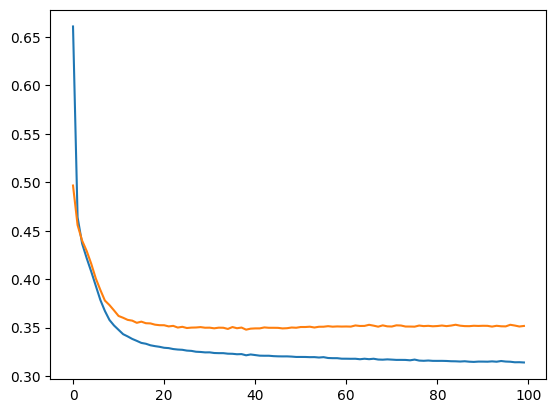

In [163]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

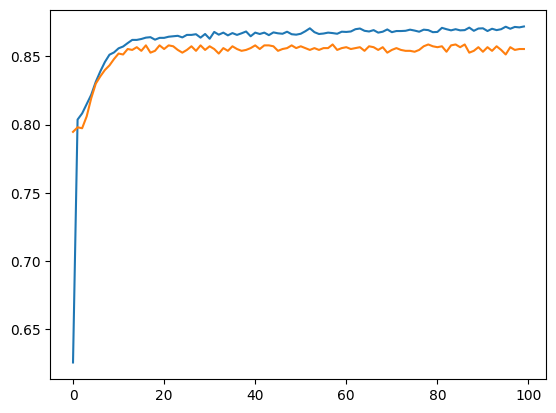

In [166]:
plt.plot(history.history['Accuracy'])
plt.plot(history.history['val_Accuracy'])